In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("..\data\processed_data.csv")
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Target
0,0.333333,0.375,0.222934,0.534247,0.000000,0.0,0.0,1.0,1
1,0.333333,0.375,0.139697,0.589041,0.011858,0.0,1.0,0.0,1
2,0.333333,0.375,0.192084,0.630137,0.019763,0.0,1.0,0.0,1
3,0.333333,0.375,0.154249,0.493151,0.027668,0.0,1.0,0.0,1
4,0.333333,0.375,0.139697,0.506849,0.035573,0.0,1.0,0.0,1


In [2]:
X = df.drop(["Target"],axis=1)
y = df['Target']

In [3]:
X_columns = X.columns.to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy="auto") 
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train) 

In [6]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([7717, 7717, 7717, 7717, 7717, 7717], dtype=int64))

In [7]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_columns)
y_train_resampled = pd.DataFrame(y_train_resampled, columns=['Target'])
X_test = pd.DataFrame(X_test, columns=X_columns)
y_test = pd.DataFrame(y_test, columns=['Target'])

In [8]:
import pycaret 
from pycaret.classification import *
s= setup(data = pd.concat([X_train_resampled, y_train_resampled], axis=1),
          target = 'Target',
          session_id = 42,
          data_split_stratify = True,
          index = False,
          train_size = len(X_train),
          test_data = pd.concat([X_test, y_test], axis=1))


,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(48302, 9)"
4,Transformed data shape,"(48302, 9)"
5,Transformed train set shape,"(46302, 9)"
6,Transformed test set shape,"(2000, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model = compare_models(sort = 'F1')

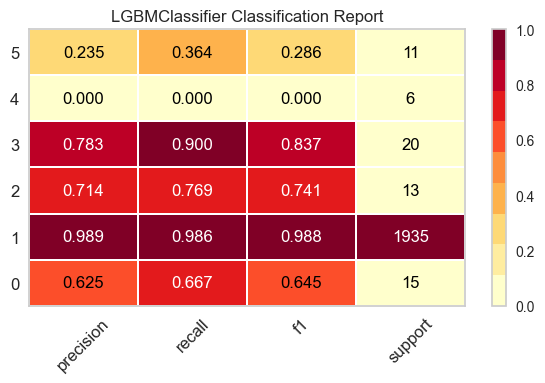

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

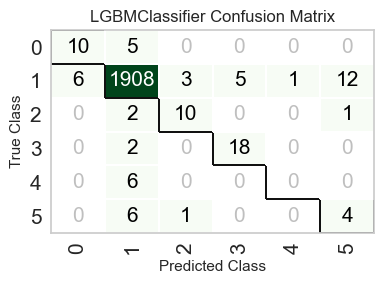

In [11]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

In [12]:
dummy_data = {
    'Air temperature [K]': [0.3333333333333286, 0.44444444444444287, 0.22222222222222143, 
                            0.7777777777777786, 0.3333333333333286, 0.5185455720329861, 0.5401266308704736],
    'Process temperature [K]': [0.5, 0.5, 0.375, 0.625, 0.375, 0.5104547106713903, 0.7152849194585769],
    'Rotational speed [rpm]': [0.24039580908032598, 0.3742724097788127, 0.45750873108265433, 
                               0.11745928319466402, 0.11397964130389841, 0.20133893627883215, 0.2116504717034246],
    'Torque [Nm]': [0.3698630136986301, 0.2876712328767123, 0.2465753424657534, 0.6301369863013699, 
                    0.726027397260274, 0.5205679573942655, 0.4261764736619937],
    'Tool wear [min]': [0.2569169960474308, 0.3043478260869565, 0.1660079051383399, 0.14712147436778086, 
                        0.8540889831344971, 0.40246624225521516, 0.8326732168616138],
    'Type_H': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    'Type_L': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
    'Type_M': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
}
dummy_df = pd.DataFrame(dummy_data)

# Train the best model obtained from compare_models


# Make predictions
predictions = predict_model(best_model, data=dummy_df)

# Display predictions
print(predictions)

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0             0.333333                 0.500000                0.240396   
1             0.444444                 0.500000                0.374272   
2             0.222222                 0.375000                0.457509   
3             0.777778                 0.625000                0.117459   
4             0.333333                 0.375000                0.113980   
5             0.518546                 0.510455                0.201339   
6             0.540127                 0.715285                0.211650   

   Torque [Nm]  Tool wear [min]  Type_H  Type_L  Type_M  prediction_label  \
0     0.369863         0.256917     0.0     0.0     1.0                 1   
1     0.287671         0.304348     1.0     0.0     0.0                 1   
2     0.246575         0.166008     0.0     1.0     0.0                 1   
3     0.630137         0.147121     0.0     1.0     0.0                 0   
4     0.726027

In [13]:
save_model(best_model, 'predictive_maintenance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]',
                                              'Type_H', 'Type_L', 'Type_M'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               st...
                  L